# IE6400 Foundations of Data Analytics Engineering
# Fall 2023 
### Module 4: Time Series Analysis Part - 1
#### - STUDENT VERSION -

### Time Series Analysis

Time series analysis is a branch of statistics and data analysis that deals with sequences of data points ordered in time. These points typically arise from observations taken sequentially, such as stock prices, weather patterns, sales data, and more. The primary aim is to extract patterns, understand underlying characteristics, and utilize these insights for forecasting, anomaly detection, and other applications.

### Key Concepts in Time Series Analysis

#### 1. Trend
- Represents the underlying long-term movement in data. For instance, a consistent increase in sales over several years is a trend.

#### 2. Seasonality
- Refers to periodic fluctuations. For example, ice cream sales might increase during summer every year.

#### 3. Cyclic Patterns
- Long-term patterns that are not of a fixed period. Unlike seasonality, they might not have a set repetition.

#### 4. Noise or Irregularity
- The random variation in the series.

#### 5. Stationarity
- A time series is stationary if its properties such as mean and variance are constant over time. Many models assume or require the series to be stationary.

#### 6. Lag
- The time difference between an observation and its previous observation.

#### 7. Autocorrelation
- Measures the relationship between a series and its lagged values.

#### Techniques and Models for Time Series Analysis

#### Moving Averages and Exponential Smoothing
- Predict future values based on weighted averages of past values.

#### ARIMA (AutoRegressive Integrated Moving Average)
- Combines autoregressive and moving average models. Accounts for trends and seasonality.

#### Seasonal Decomposition
- Decomposes a series into its trend, seasonal, and residual components.

#### Prophet
- An open-source forecasting tool by Facebook, designed for time series with strong seasonal effects.

#### State Space Models and Kalman Filtering
- Allow for dynamic modeling and can adapt to changes over time.

#### LSTM (Long Short-Term Memory)
- A type of recurrent neural network suitable for modeling long sequences.

#### Applications

Time series analysis has wide applications including:
- **Finance**: Stock price prediction.
- **Meteorology**: Weather forecasting.
- **Economics**: Macroeconomic forecasting.
- **Healthcare**: Predicting disease outbreaks.

Understanding the time series analysis can provide actionable insights and forecasting abilities across numerous domains.


#### Exercise 1 Understanding Trend

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generating a time series dataset
np.random.seed(42)
time = pd.date_range(start='1/1/2020', end='1/1/2023', freq='M')
trend = np.linspace(start=50, stop=100, num=len(time))
noise = np.random.normal(loc=0, scale=5, size=len(time))
data = trend + noise

df = pd.DataFrame(data, columns=['Value'], index=time)

# Displaying the first few rows of the dataset
print(df.head())

                Value
2020-01-31  52.483571
2020-02-29  50.737250
2020-03-31  56.095586
2020-04-30  61.900864
2020-05-31  54.543519


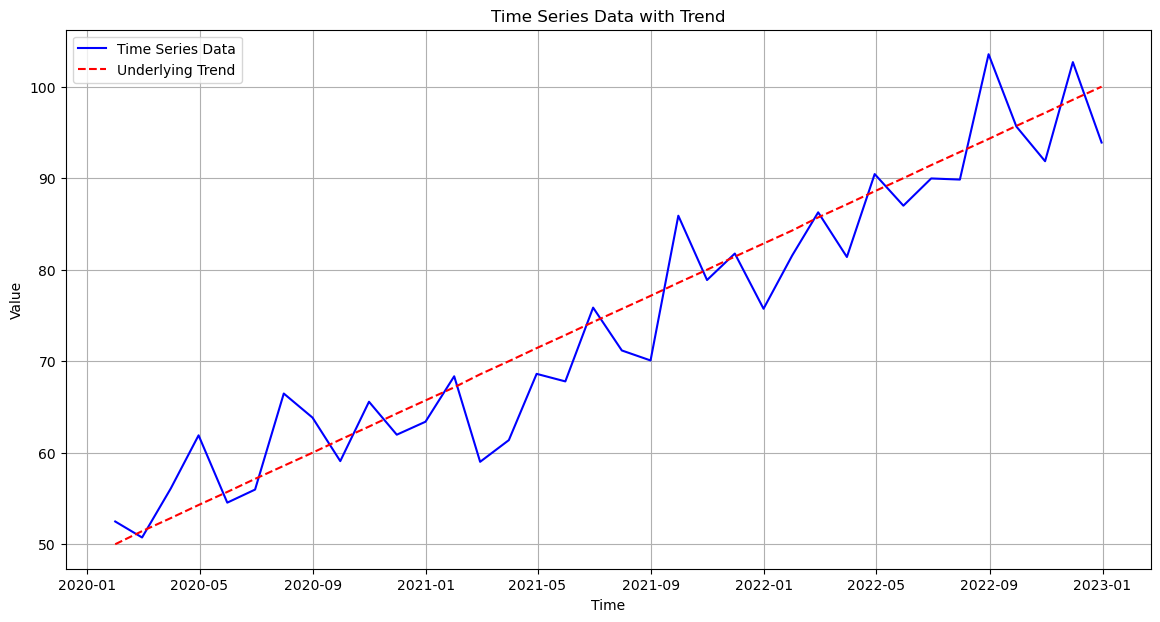

In [2]:
# Visualizing the time series data
plt.figure(figsize=(14,7))
plt.plot(np.array(df.index), np.array(df['Value']), label='Time Series Data', color='blue')
plt.plot(np.array(df.index), np.array(trend), label='Underlying Trend', color='red', linestyle='--')
plt.title('Time Series Data with Trend')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

#### Exercise 2 Detrending

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings 
warnings.filterwarnings('ignore') 

# Loading the AirPassengers dataset
df = sm.datasets.get_rdataset('AirPassengers').data

# Displaying the first few rows of the dataset
df.head()


,time,value
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


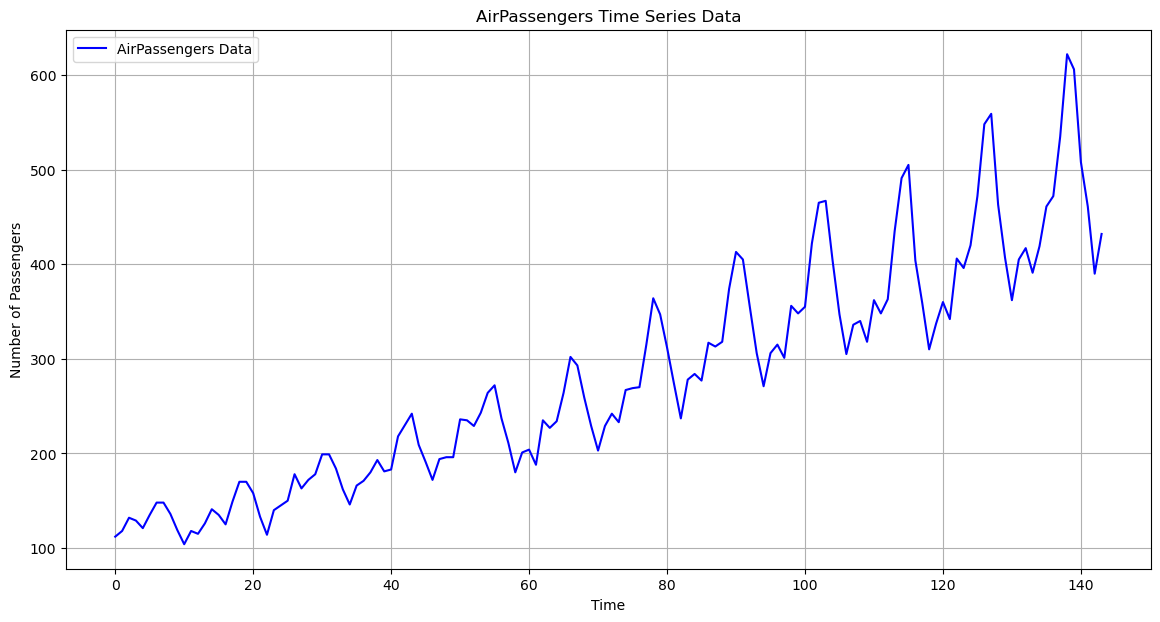

In [4]:
# Visualizing the time series data

plt.figure(figsize=(14,7))
plt.plot(list(df.index), df['value'].values, label='AirPassengers Data', color='blue')
plt.title('AirPassengers Time Series Data')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()


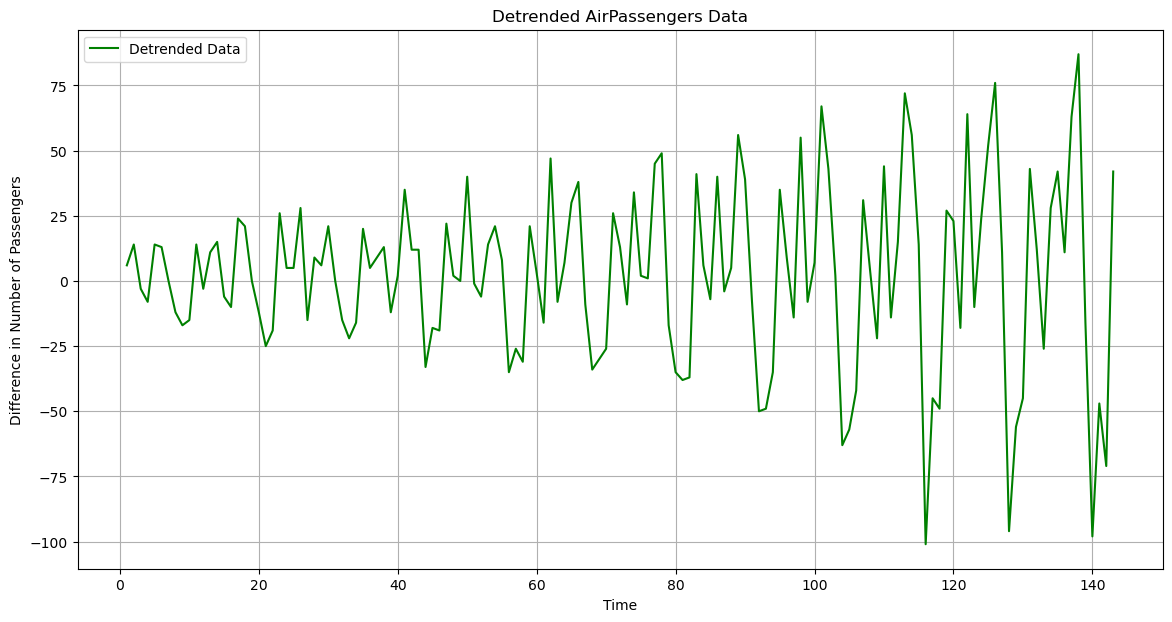

In [5]:
# Detrending the time series data using differencing
df['Detrended'] = df['value'].diff()

# Visualizing the detrended data
plt.figure(figsize=(14,7))
plt.plot(list(df.index), df['Detrended'].values, label='Detrended Data', color='green')
plt.title('Detrended AirPassengers Data')
plt.xlabel('Time')
plt.ylabel('Difference in Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()


#### Exercise 3 Time Series Analysis: Seasonality

In [6]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Loading the AirPassengers dataset
df = sm.datasets.get_rdataset('AirPassengers').data

# Setting the index to be a datetime index with monthly frequency
df.index = pd.date_range(start='1949-01-01', end='1961-01-01', freq='M')

# Displaying the first few rows of the dataset
df.head()


,time,value
1949-01-31,1949.000000,112
1949-02-28,1949.083333,118
1949-03-31,1949.166667,132
1949-04-30,1949.250000,129
1949-05-31,1949.333333,121


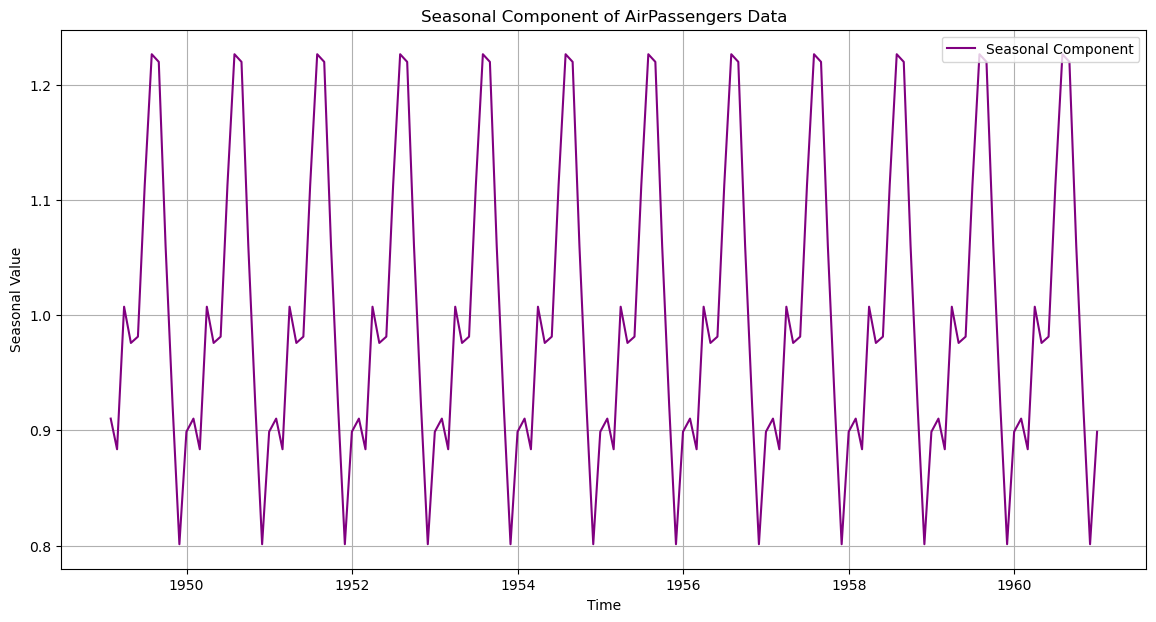

In [7]:
# Decomposing the time series data to extract seasonality
decomposition = sm.tsa.seasonal_decompose(df['value'], model='multiplicative')

# Visualizing the seasonal component
plt.figure(figsize=(14,7))
plt.plot(decomposition.seasonal, label='Seasonal Component', color='purple')
plt.title('Seasonal Component of AirPassengers Data')
plt.xlabel('Time')
plt.ylabel('Seasonal Value')
plt.legend()
plt.grid(True)
plt.show()


#### Exercise 4 Time Series Analysis: Cyclic Patterns

In [8]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Loading the AirPassengers dataset
df = sm.datasets.get_rdataset('AirPassengers').data

# Setting the index to be a datetime index with monthly frequency
df.index = pd.date_range(start='1949-01-01', end='1961-01-01', freq='M')

# Displaying the first few rows of the dataset
df.head()


,time,value
1949-01-31,1949.000000,112
1949-02-28,1949.083333,118
1949-03-31,1949.166667,132
1949-04-30,1949.250000,129
1949-05-31,1949.333333,121


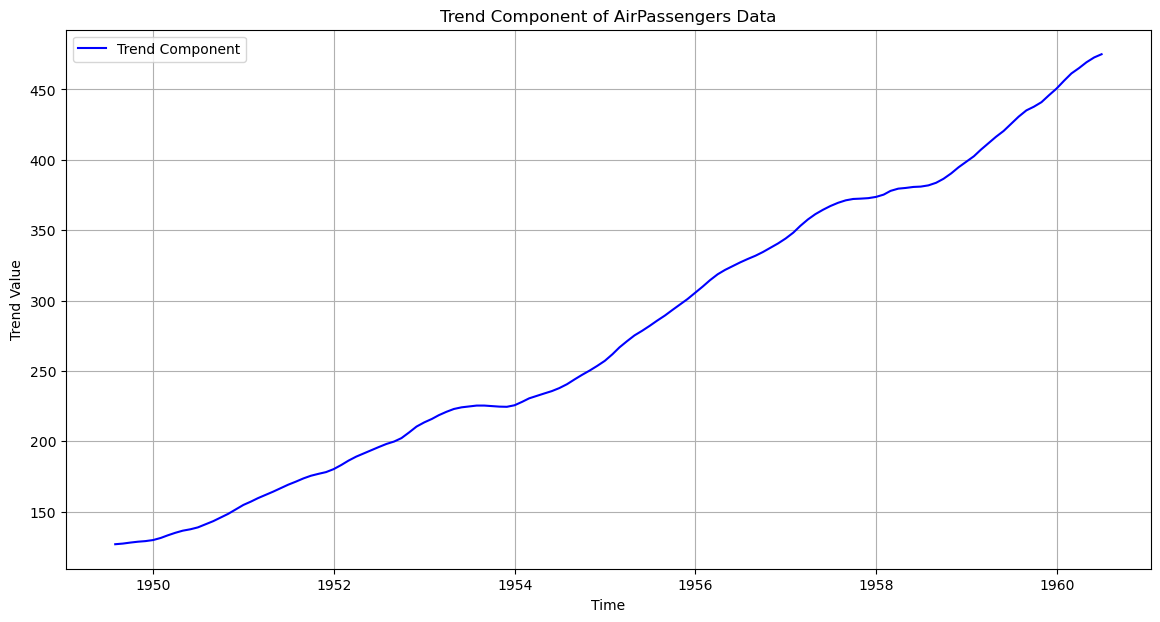

In [9]:
# Decomposing the time series data to extract trend
decomposition = sm.tsa.seasonal_decompose(df['value'], model='multiplicative')

# Visualizing the trend component
plt.figure(figsize=(14,7))
plt.plot(decomposition.trend, label='Trend Component', color='blue')
plt.title('Trend Component of AirPassengers Data')
plt.xlabel('Time')
plt.ylabel('Trend Value')
plt.legend()
plt.grid(True)
plt.show()


#### Exercise 5 Time Series Analysis: Noise or Irregularity

In [10]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Loading the AirPassengers dataset
df = sm.datasets.get_rdataset('AirPassengers').data

# Setting the index to be a datetime index with monthly frequency
df.index = pd.date_range(start='1949-01-01', end='1961-01-01', freq='M')

# Displaying the first few rows of the dataset
df.head()


,time,value
1949-01-31,1949.000000,112
1949-02-28,1949.083333,118
1949-03-31,1949.166667,132
1949-04-30,1949.250000,129
1949-05-31,1949.333333,121


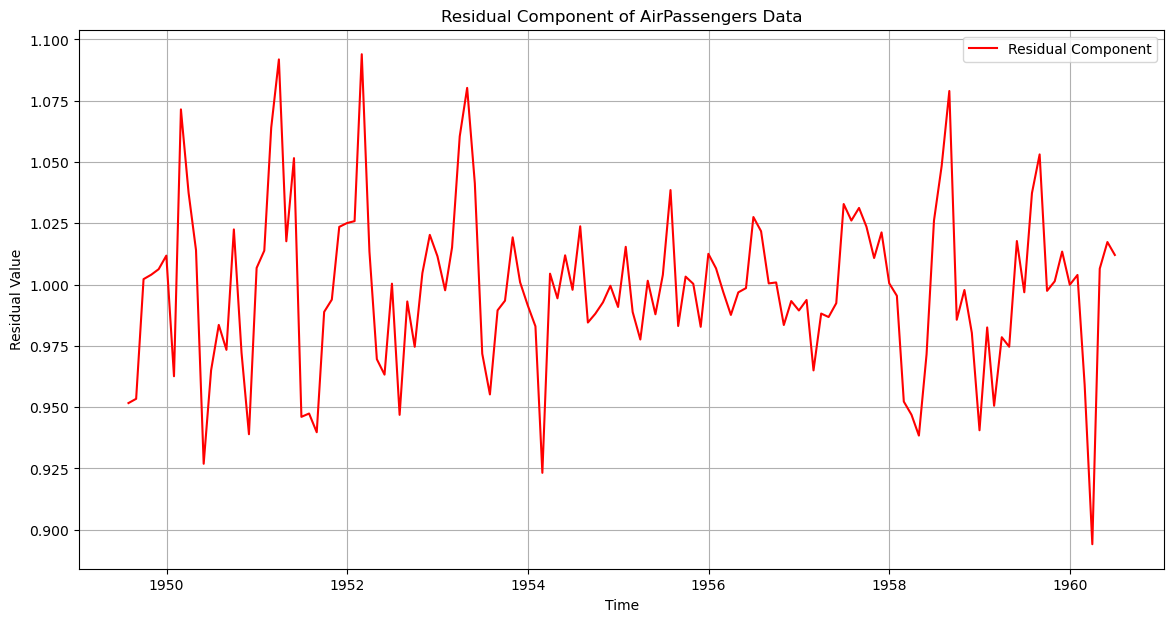

In [12]:
# Decomposing the time series data to extract residuals
decomposition = sm.tsa.seasonal_decompose(df['value'], model='multiplicative')

# Visualizing the residual component
plt.figure(figsize=(14,7))
plt.plot(decomposition.resid, label='Residual Component', color='red')
plt.title('Residual Component of AirPassengers Data')
plt.xlabel('Time')
plt.ylabel('Residual Value')
plt.legend()
plt.grid(True)
plt.show()


#### Exercise 6 Time Series Analysis: Stationarity

In [13]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Loading the CO2 dataset
df = sm.datasets.co2.load_pandas().data

# Handling missing values by forward filling
df.fillna(method='ffill', inplace=True)

# Displaying the first few rows of the dataset
df.head()


,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


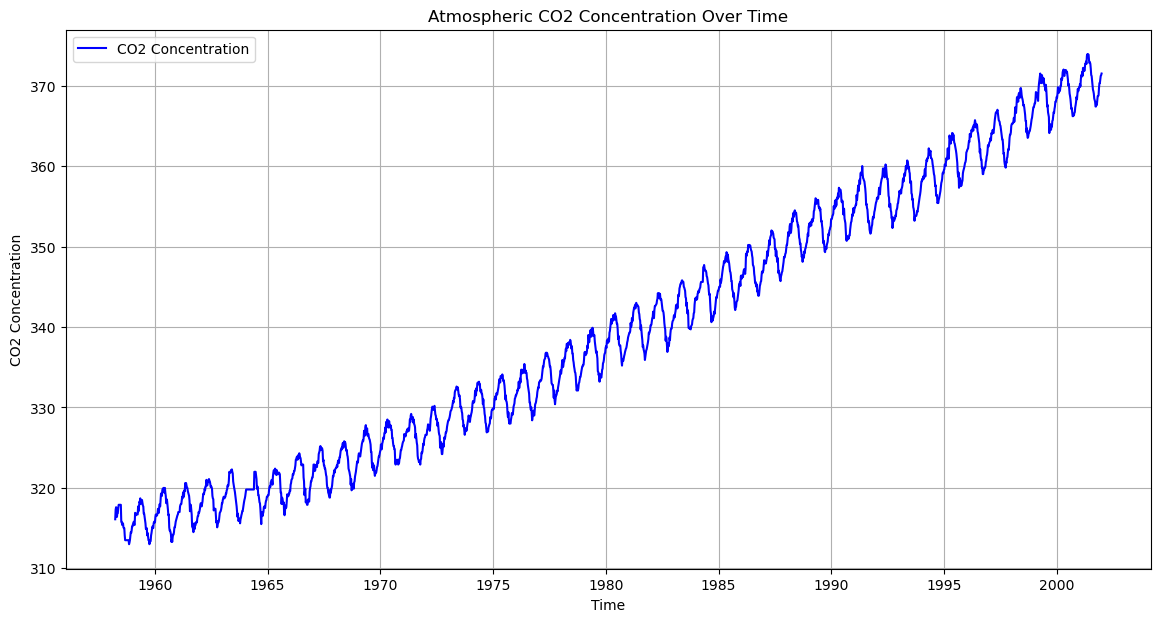

In [14]:
# Visualizing the time series data
plt.figure(figsize=(14,7))
plt.plot(df, label='CO2 Concentration', color='blue')
plt.title('Atmospheric CO2 Concentration Over Time')
plt.xlabel('Time')
plt.ylabel('CO2 Concentration')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
# Performing the Augmented Dickey-Fuller test
result = adfuller(df['co2'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


ADF Statistic: 0.04605110843812238
p-value: 0.962178784678435
Critical Values: {'1%': -3.4332519309441296, '5%': -2.8628219967376647, '10%': -2.567452466810334}


#### Exercise 7 Understanding Lags

In [16]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot

# Loading the AirPassengers dataset
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', parse_dates=['Month'], index_col='Month')

# Displaying the first few rows of the dataset
df.head()


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


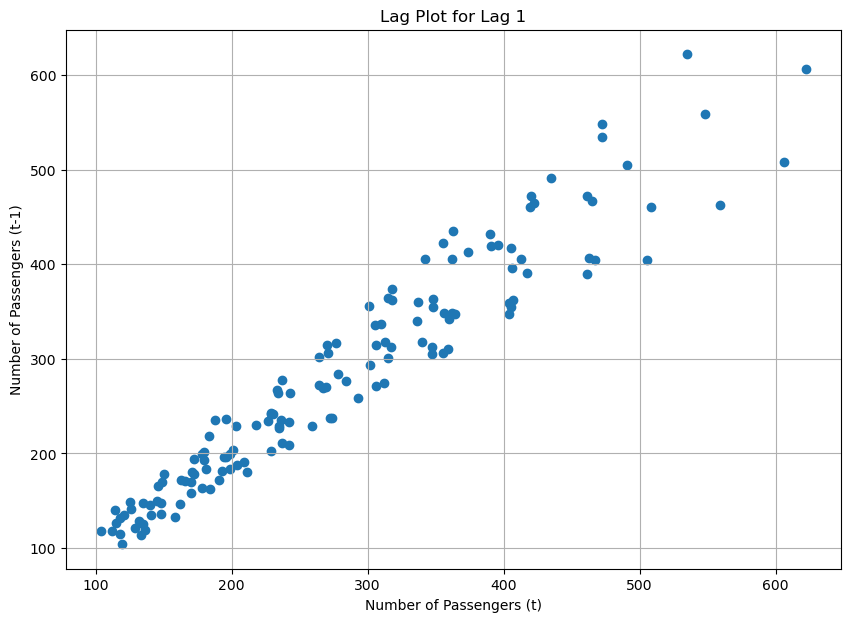

In [18]:
# Creating a lag plot for lag 1
plt.figure(figsize=(10,7))
lag_plot(df, lag=1)
plt.title('Lag Plot for Lag 1')
plt.xlabel('Number of Passengers (t)')
plt.ylabel('Number of Passengers (t-1)')
plt.grid(True)
plt.show()


#### Exercise 8 Understanding Autocorrelation

In [19]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Loading the AirPassengers dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, header=0, index_col=0, parse_dates=True)

# Displaying the first few rows of the dataset
print(df.head())


            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


<Figure size 1200x700 with 0 Axes>

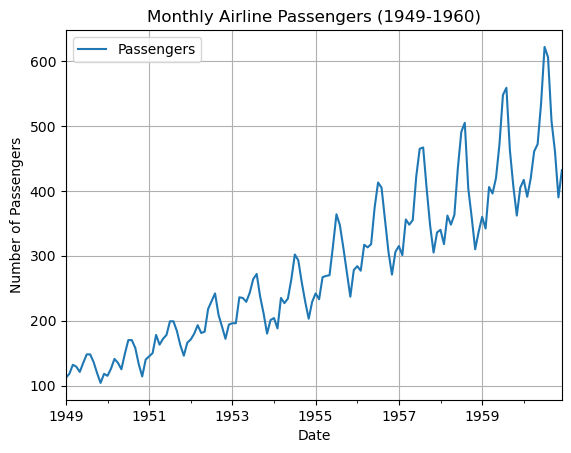

In [20]:
# Plotting the time series data
plt.figure(figsize=(12,7))
df.plot(title='Monthly Airline Passengers (1949-1960)')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()


<Figure size 1200x700 with 0 Axes>

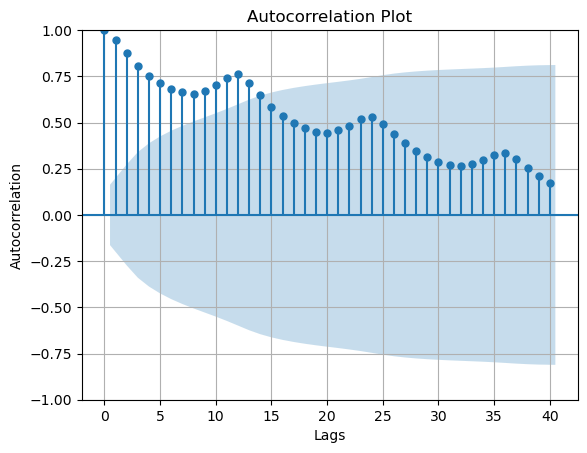

In [21]:
# Creating an autocorrelation plot
plt.figure(figsize=(12,7))
plot_acf(df, lags=40)
plt.title('Autocorrelation Plot')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()


#### Exercise 9 Moving Averages and Exponential Smoothing

In [22]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Loading the Shampoo Sales dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv'
df = pd.read_csv(url, header=0, index_col=0, parse_dates=True)

# Displaying the first few rows of the dataset
print(df.head())


       Sales
Month       
1-01   266.0
1-02   145.9
1-03   183.1
1-04   119.3
1-05   180.3


<Figure size 1200x700 with 0 Axes>

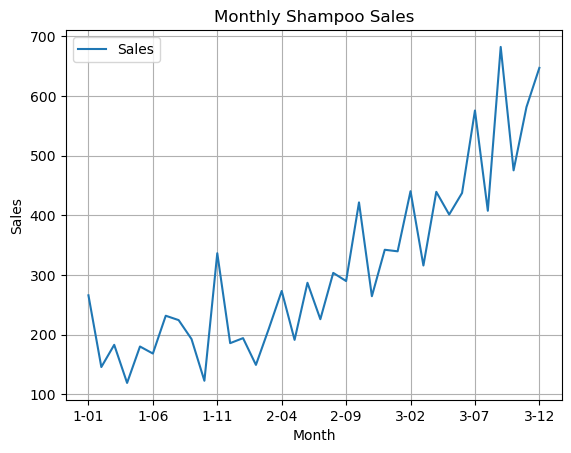

In [23]:
# Plotting the time series data
plt.figure(figsize=(12,7))
df.plot(title='Monthly Shampoo Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


<Figure size 1200x700 with 0 Axes>

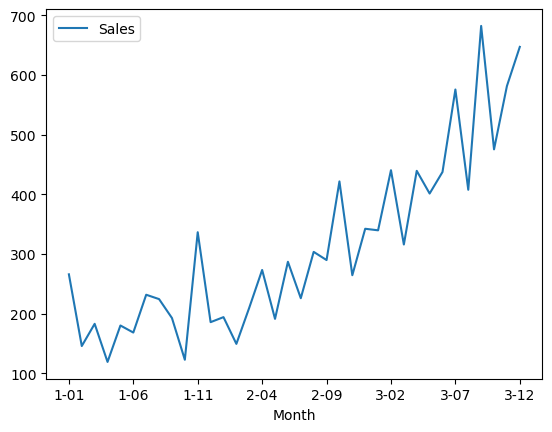

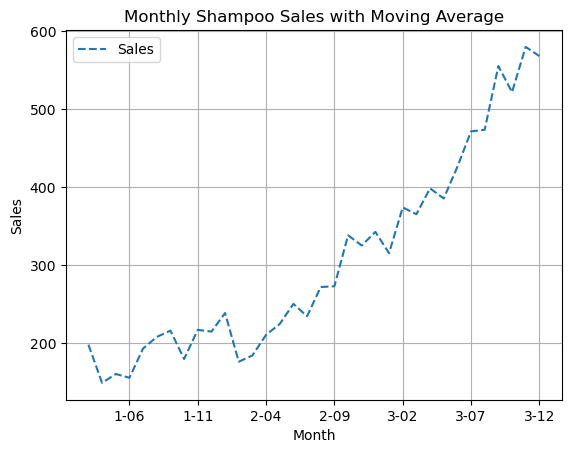

In [24]:
# Applying moving average with a window size of 3 months
moving_avg = df.rolling(window=3).mean()

# Plotting the original data and moving average
plt.figure(figsize=(12,7))
df.plot(label='Original Data')
moving_avg.plot(label='Moving Average (3 months)', linestyle='--')
plt.title('Monthly Shampoo Sales with Moving Average')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


<Figure size 1200x700 with 0 Axes>

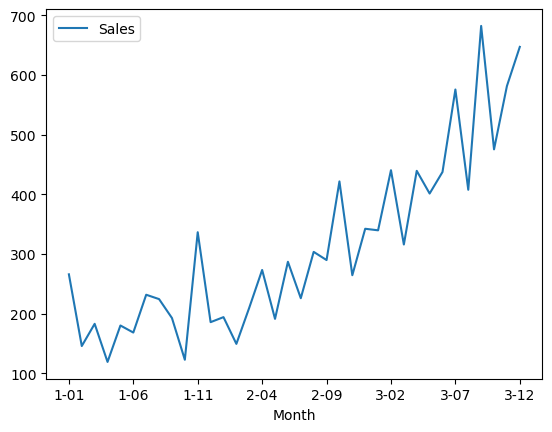

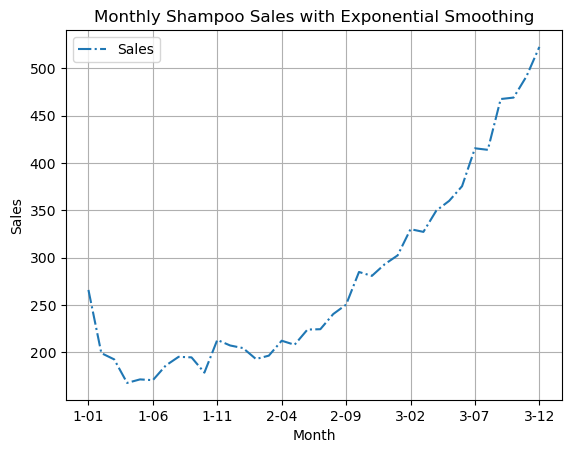

In [25]:
# Applying exponential smoothing
alpha = 0.2
exp_smoothed = df.ewm(alpha=alpha).mean()

# Plotting the original data and exponential smoothed data
plt.figure(figsize=(12,7))
df.plot(label='Original Data')
exp_smoothed.plot(label=f'Exponential Smoothing (alpha={alpha})', linestyle='-.')
plt.title('Monthly Shampoo Sales with Exponential Smoothing')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


#### Exercise 10 ARIMA

In [26]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

# Loading the Airline Passengers dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, header=0, index_col=0, parse_dates=True)

# Displaying the first few rows of the dataset
df.head()


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Figure size 1200x700 with 0 Axes>

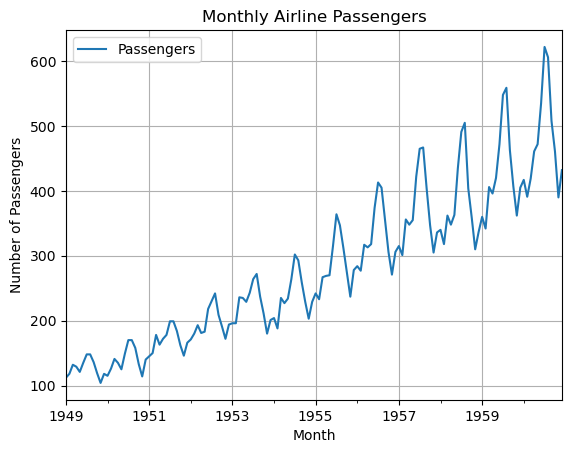

In [27]:
# Plotting the time series data
plt.figure(figsize=(12,7))
df.plot(title='Monthly Airline Passengers')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()


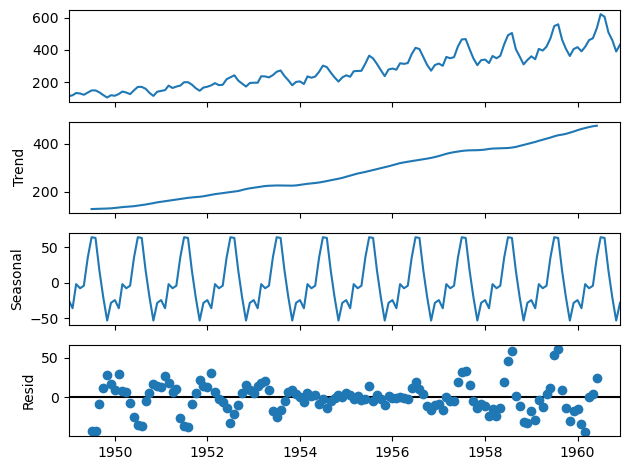

In [28]:
# Decomposing the time series
decomposition = seasonal_decompose(df)

# Plotting the decomposed components
decomposition.plot()
plt.show()


<Figure size 1200x700 with 0 Axes>

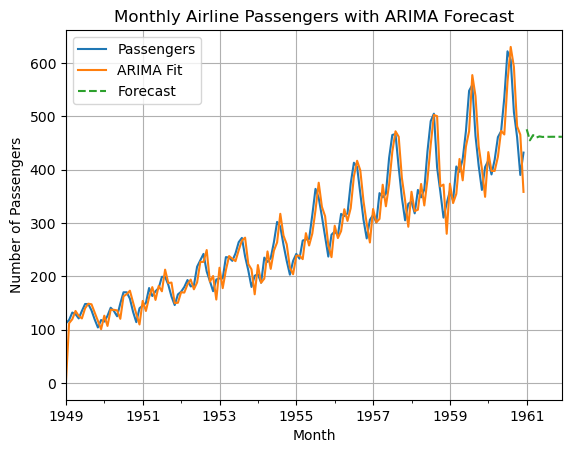

In [29]:
import warnings
warnings.filterwarnings("ignore")

# Determining ARIMA parameters (for simplicity, we'll use p=1, d=1, q=1)
p, d, q = 1, 1, 1

# Fitting the ARIMA model
model = ARIMA(df, order=(p,d,q))
results = model.fit()

# Forecasting future values
forecast = results.forecast(steps=12)

# Plotting the original data, ARIMA fit, and forecast
plt.figure(figsize=(12,7))
df.plot(label='Original Data')
results.fittedvalues.plot(label='ARIMA Fit')
forecast.plot(label='Forecast', linestyle='--')
plt.title('Monthly Airline Passengers with ARIMA Forecast')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()


#### Exercise 11 Seasonal Decomposition

In [30]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Loading the CO2 levels dataset
url = 'https://datahub.io/core/co2-ppm/r/co2-mm-mlo.csv'
df = pd.read_csv(url, header=0, index_col='Date', parse_dates=True)

# Displaying the first few rows of the dataset
df.head()


,Decimal Date,Average,Interpolated,Trend,Number of Days
Date,,,,,
1958-03-01,1958.208,315.71,315.71,314.62,-1
1958-04-01,1958.292,317.45,317.45,315.29,-1
1958-05-01,1958.375,317.50,317.50,314.71,-1
1958-06-01,1958.458,-99.99,317.10,314.85,-1
1958-07-01,1958.542,315.86,315.86,314.98,-1


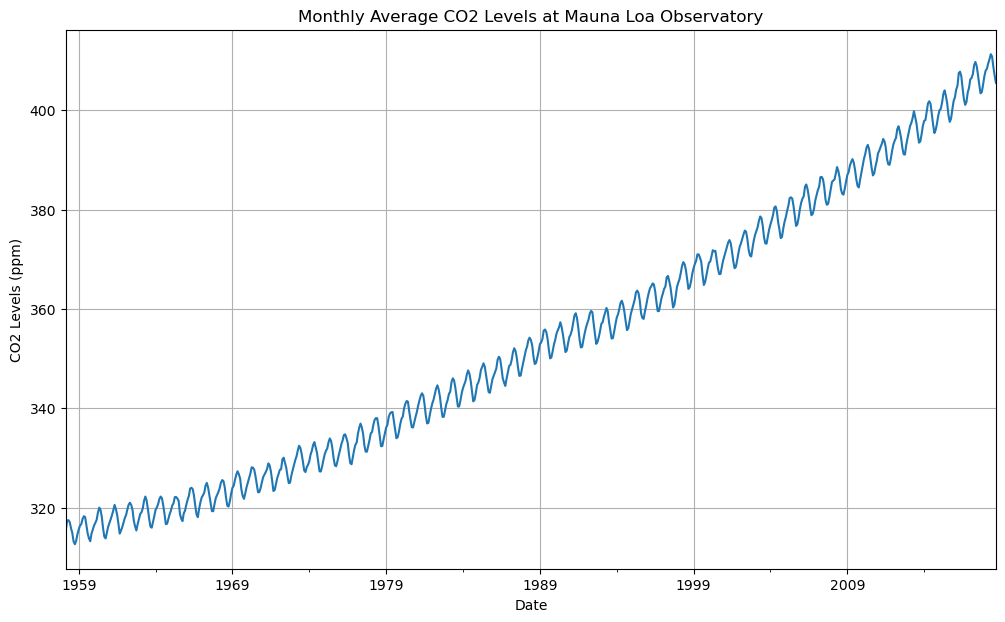

In [31]:
# Plotting the time series data
plt.figure(figsize=(12,7))
df['Interpolated'].plot(title='Monthly Average CO2 Levels at Mauna Loa Observatory')
plt.xlabel('Date')
plt.ylabel('CO2 Levels (ppm)')
plt.grid(True)
plt.show()


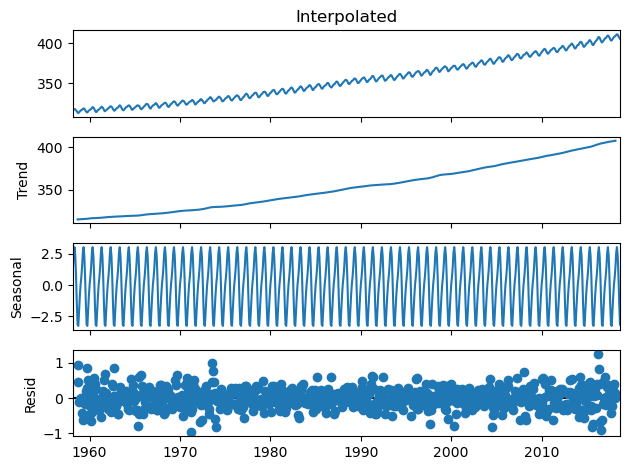

In [32]:
# Decomposing the time series
decomposition = seasonal_decompose(df['Interpolated'], model='additive')

# Plotting the decomposed components
decomposition.plot()
plt.show()


#### Exercise 12 Time Series Forecasting using Neural Networks

In [33]:
import pandas as pd

# Fetching Apple's stock price data from the provided dataset
url = 'https://raw.githubusercontent.com/matplotlib/sample_data/master/aapl.csv'
df = pd.read_csv(url, parse_dates=['Date'], index_col='Date')
df.head()


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08
2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26
2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80
2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74
2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79


In [34]:
df.isnull().sum()


Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [35]:
def create_features(data, n):
    for i in range(1, n+1):
        data[f'lag_{i}'] = data['Close'].shift(i)
    data = data.dropna()
    return data

n = 5
df = create_features(df, n)
X = df.drop('Close', axis=1).values
y = df['Close'].values


In [36]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [37]:
# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [38]:
# Building the model
model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [39]:
model.fit(X_train, y_train)


MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [40]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.28682986700229923


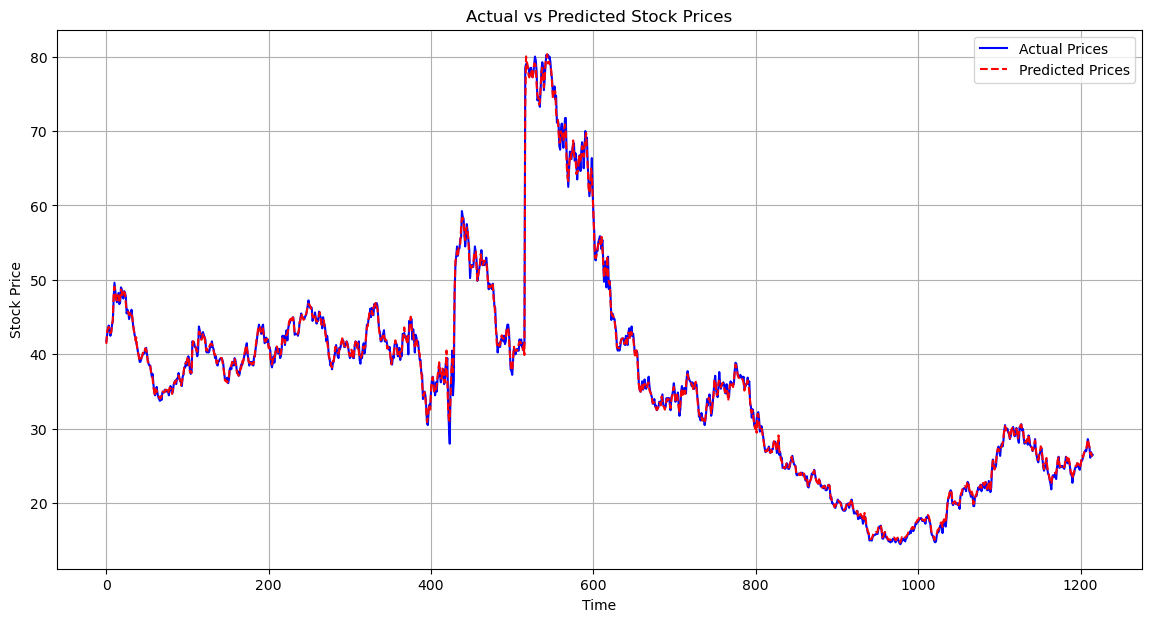

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(y_test, label="Actual Prices", color='blue')
plt.plot(y_pred, label="Predicted Prices", color='red', linestyle='dashed')
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()


#### Exercise 13 Predicting Financial Time Series Data: A Case Study on Apple Inc.

In [42]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore') 

# Fetching Apple's stock price data from the provided dataset
url = 'https://raw.githubusercontent.com/matplotlib/sample_data/master/aapl.csv'
df = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# Displaying the first few rows of the dataset
df.head()


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08
2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26
2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80
2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74
2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79


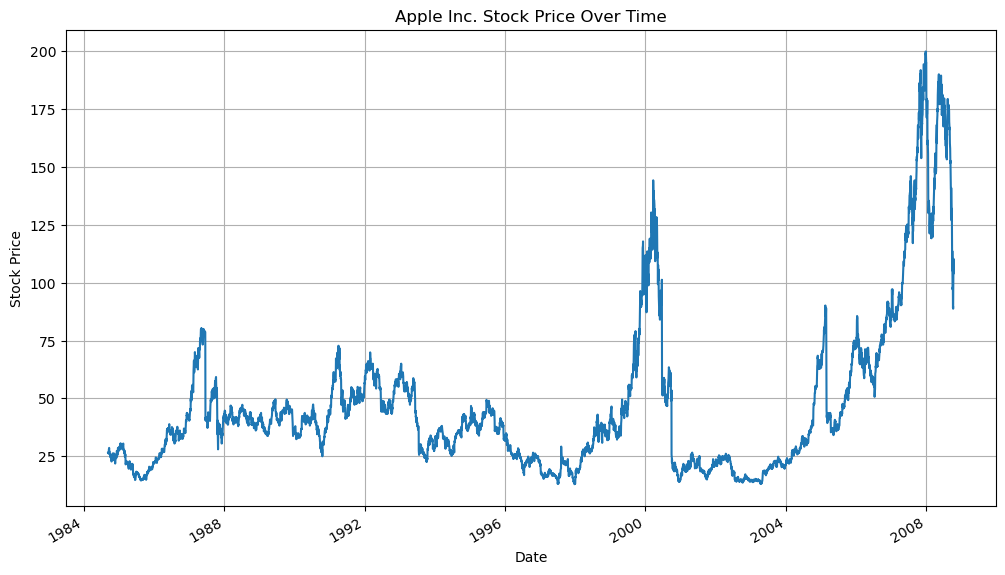

In [43]:
# Plotting the stock price data
plt.figure(figsize=(12,7))
df['Close'].plot(title='Apple Inc. Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()


In [44]:
# Creating lag features
look_back = 5
for i in range(1, look_back + 1):
    df[f'lag_{i}'] = df['Close'].shift(i)

# Dropping NaN values
df = df.dropna()

# Splitting the dataset into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

X_train = train.drop('Close', axis=1)
y_train = train['Close']
X_test = test.drop('Close', axis=1)
y_test = test['Close']


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Training the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicting on the test set
lr_preds = lr.predict(X_test)

# Calculating the RMSE
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
lr_rmse


0.41674145408833074

In [46]:
from sklearn.tree import DecisionTreeRegressor

# Training the model
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# Predicting on the test set
dt_preds = dt.predict(X_test)

# Calculating the RMSE
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_preds))
dt_rmse


0.8710575657754985

In [47]:
from sklearn.ensemble import RandomForestRegressor

# Training the model
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

# Predicting on the test set
rf_preds = rf.predict(X_test)

# Calculating the RMSE
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_rmse


0.5571767818802597

In [48]:
# Comparing RMSE values
model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'RMSE': [lr_rmse, dt_rmse, rf_rmse]
})

model_comparison.sort_values('RMSE', ascending=True)


,Model,RMSE
0,Linear Regression,0.416741
2,Random Forest,0.557177
1,Decision Tree,0.871058


---

#### Revised Date: November 11, 2023